# KNN

## importy

In [17]:
from data_encoder import encode_data
import pandas as pd
from sklearn import neighbors
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## dane

           dt  switch        src       dst  pktcount  bytecount  dur  \
0       11425       1   10.0.0.1  10.0.0.8     45304   48294064  100   
1       11605       1   10.0.0.1  10.0.0.8    126395  134737070  280   
2       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
3       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
4       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
...       ...     ...        ...       ...       ...        ...  ...   
104340   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104341   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104342   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104343   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104344   5262       3  10.0.0.11  10.0.0.5        31       3038   31   

         dur_nsec       tot_dur  flows  ...  pktrate  Pairflow  Protocol  \
0       716000000  1.010000e+11      3  ...      451       

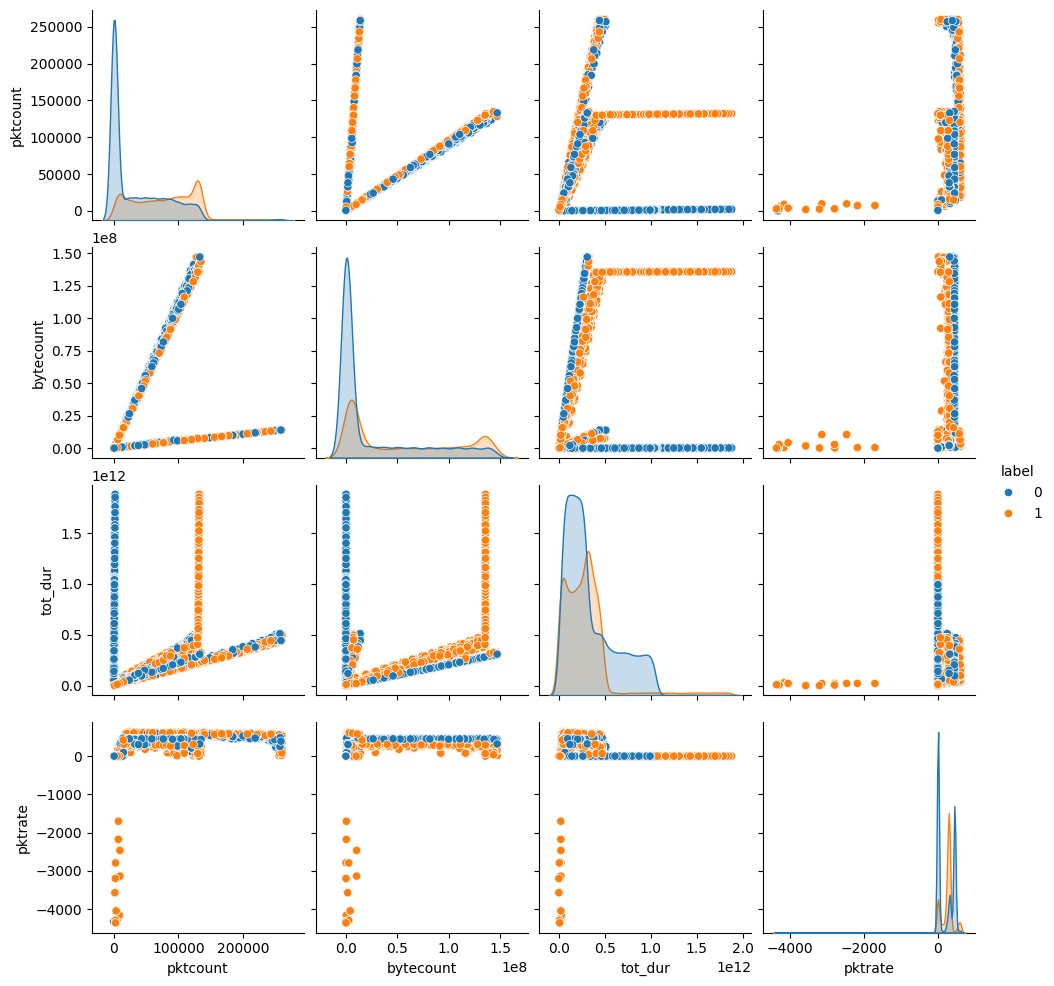

In [18]:
network_data = pd.read_csv('dataset_sdn.csv')
print(network_data)
null_info = network_data.isna().sum()
print(null_info)

ip_encoding = 3 #one hot encoding
X_train, X_test, y_train, y_test = encode_data(network_data, ip_encoding)

X_train['label'] = y_train
sns.pairplot(X_train, hue='label', vars=['pktcount', 'bytecount', 'tot_dur', 'pktrate'])
plt.show()
X_train = X_train.drop(columns=['label'])  


## uczenie modelu

In [19]:
clf = neighbors.KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.88      0.97      0.92     19190
           1       0.94      0.78      0.85     11962

    accuracy                           0.90     31152
   macro avg       0.91      0.88      0.89     31152
weighted avg       0.90      0.90      0.89     31152

